# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">FILL IN TIME</span>
* A2. Gradient Orientation: <span style="color:red;">FILL IN TIME</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* B. Hough Transform (Circles):  <span style="color:red;">FILL IN TIME</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.filters import gaussian

Maximum Gradient Magnitude Strength: 255.0
Minimum Gradient Magnitude Strength: 0.0


Text(0.5, 1.0, 'Output: Blocks Edges')

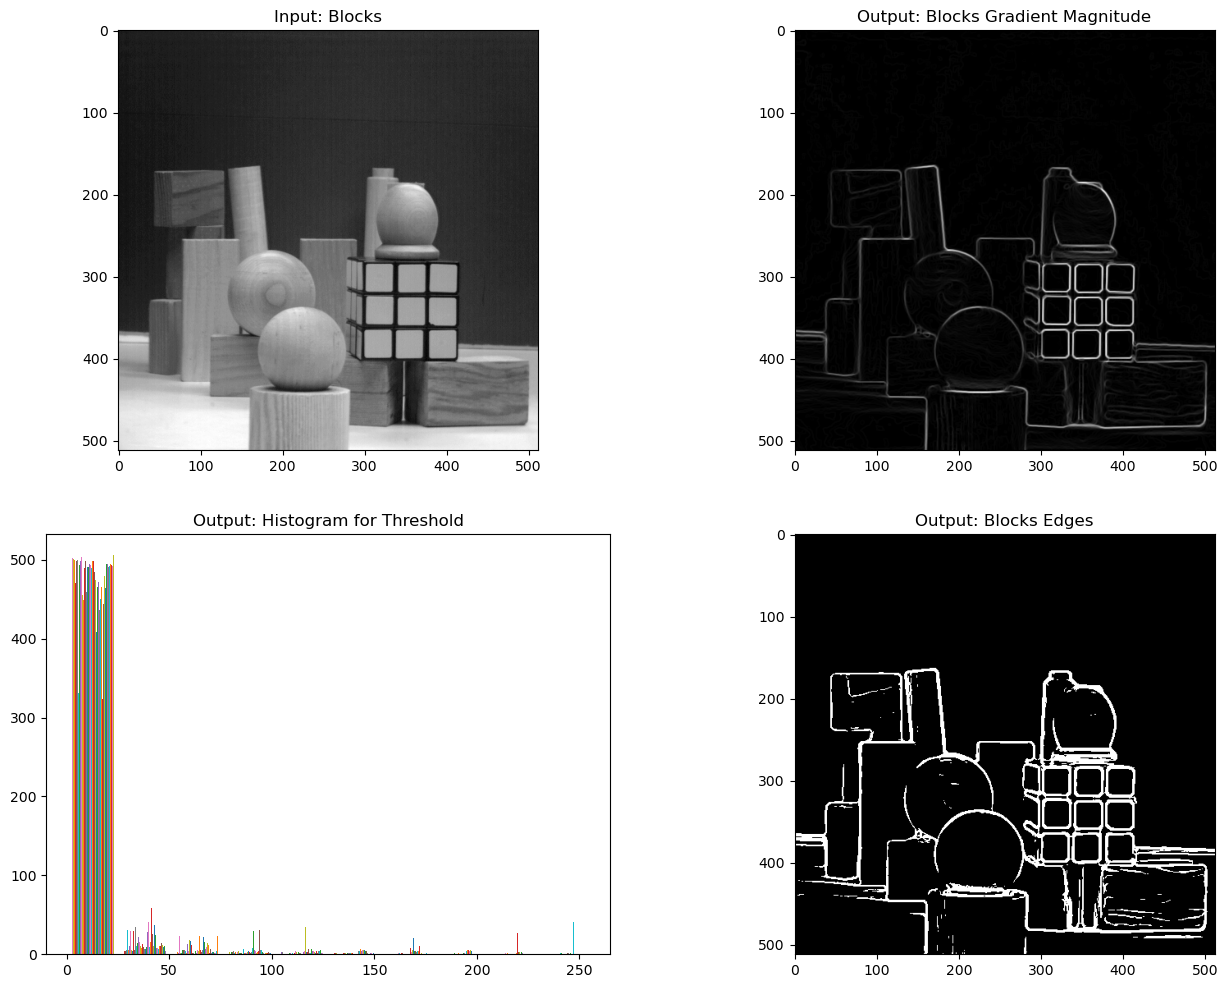

In [36]:
# Part 1. Compute the Gradient Magnitude

def find_edges(image): #using the method sobel kernel

    #preprocessing
    ksize = 3
    # image = cv2.GaussianBlur(image, (3, 3), sigmaX=0.8)
    image = cv2.medianBlur(image, 7)

    # sobel kernel
    kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]) 
    ky = kx.T
    dx = cv2.filter2D(image, cv2.CV_64F, kx)
    dy = cv2.filter2D(image, cv2.CV_64F, ky)

    #using cv2.Sobel function to get dx & dy
    # dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    # dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    #gradient magnitude
    mag = np.sqrt(dx**2+dy**2)

    #normalize mag between 0 and 255
    mag /= mag.max()
    mag *= 255

    #check max and min
    print(f'Maximum Gradient Magnitude Strength: {np.max(mag)}')
    print(f'Minimum Gradient Magnitude Strength: {np.min(mag)}')

    #create values for edges, thin out weak edges, {} seems to be best threshold
    
    threshold_high = 255
    threshold_low = 23
    edges = mag[:, :]
    edges = np.where((edges > threshold_low) & (edges < threshold_high), 1, 0)

    return edges, mag

blocks = cv2.imread('blocks.png', cv2.IMREAD_GRAYSCALE) 

edges, gradient_mag = find_edges(blocks)

# Show your results on the blocks image

plt.figure(figsize=(16,12))
plt.subplot(221)
plt.imshow(blocks, cmap='gray')
plt.title('Input: Blocks')
plt.subplot(222)
plt.imshow(gradient_mag, cmap='gray')
plt.title('Output: Blocks Gradient Magnitude')
plt.subplot(223)
plt.hist(gradient_mag)
plt.title('Output: Histogram for Threshold')
plt.subplot(224)
plt.imshow(edges, cmap='gray', vmin=0, vmax=1)
plt.title('Output: Blocks Edges')

In [37]:
# square = cv2.imread('2D_White_Box.png', cv2.IMREAD_GRAYSCALE) 

# edges_square, gradient_mag_square = find_edges(square)

# # Show your results on the blocks image

# plt.figure(figsize=(16,12))
# plt.subplot(221)
# plt.imshow(square, cmap='gray')
# plt.title('Input: Square')
# plt.subplot(222)
# plt.imshow(gradient_mag_square, cmap='gray')
# plt.title('Output: Square Gradient Magnitude')
# plt.subplot(223)
# plt.hist(gradient_mag_square)
# plt.title('Output: Histogram for Threshold')
# plt.subplot(224)
# plt.imshow(edges_square, cmap='gray', vmin=0, vmax=1)
# plt.title('Output: Square Edges')

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

255.0
0.07942164125342133


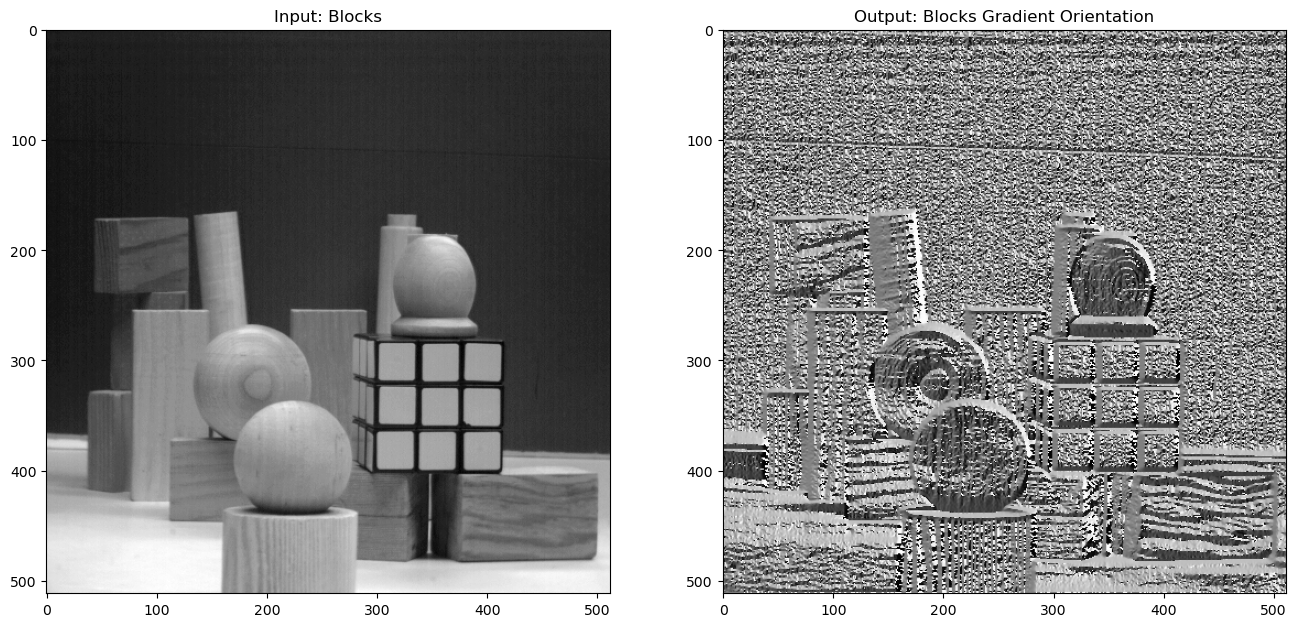

In [38]:
# Part 2. Compute the Gradient Orientation

def gradient_orientation(image): #using the method sobel kernel

    #sobel kernel
    kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]) 
    ky = kx.T
    dx = cv2.filter2D(image, cv2.CV_64F, kx)
    dy = cv2.filter2D(image, cv2.CV_64F, ky)    

    #useing cv2.Sobel function
    # dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    # dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    #orientation formula
    orientation = ((np.arctan2(dy, dx) + np.pi) / (np.pi*2)) * 255
    return orientation

gradient_orientation = gradient_orientation(blocks) #changed range from 0 - 255

# Show your results on the blocks image

plt.figure(figsize=(16,14))
plt.subplot(121)
plt.imshow(blocks, cmap='gray')
plt.title('Input: Blocks')
plt.subplot(122)
plt.imshow(gradient_orientation, cmap='gray')
plt.title('Output: Blocks Gradient Orientation')

print(np.max(gradient_orientation))
print(np.min(gradient_orientation))

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



[[ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
[[False  True False ... False False False]
 [False  True  True ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Text(0.5, 1.0, 'Output: Laplacian Zero Crossings')

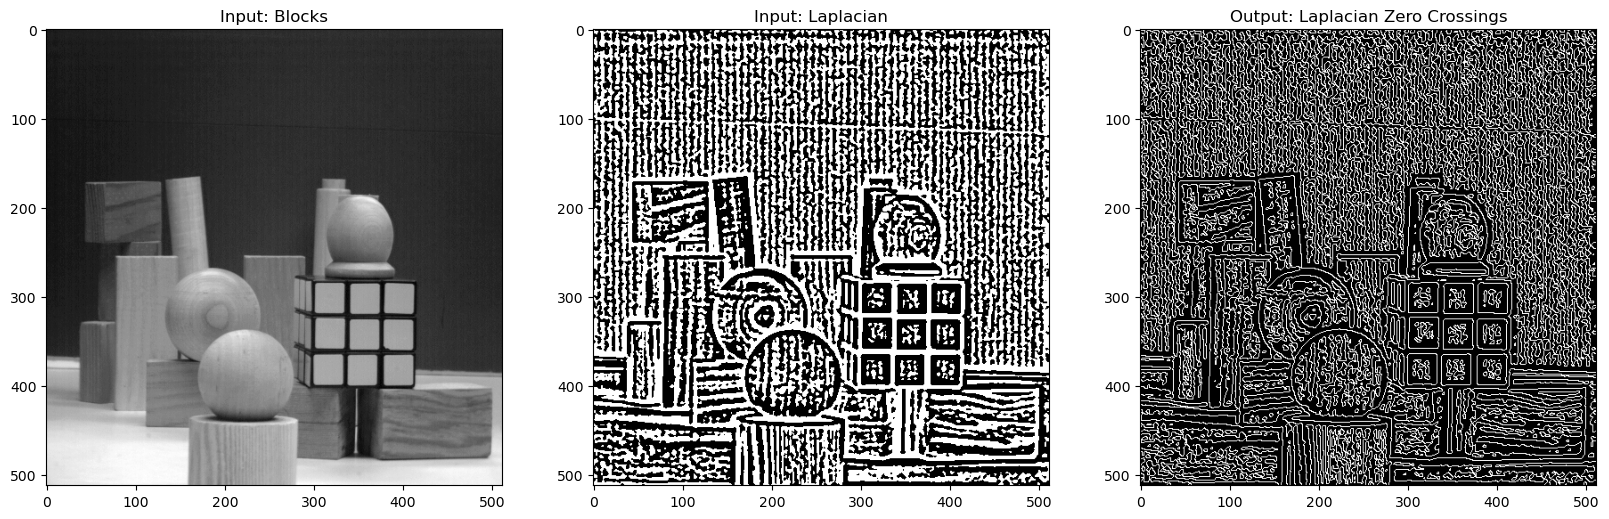

In [39]:
# Part 3. Find the Zero Crossings
def laplacian(image):

    #preprocessing
    ksize = 3
    # image = cv2.GaussianBlur(image, (9,9), 0.9)
    # image = cv2.medianBlur(image, 5)

    laplacian_kernel = np.array([[0, 1, 0],
                            [1,-4, 1],
                            [0, 1, 0]])
    # laplacian_kernel = np.array([[1, 4, 1],
    #                         [4,-20, 4],
    #                         [1, 4, 1]])

    # lap = cv2.Laplacian(image, cv2.CV_64F)
    lap = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel)
    lap = gaussian(lap, sigma=1.7)


    change_lap = lap
    change_lap[change_lap > 0] = 1
    change_lap[change_lap < 0] = -1
    print(change_lap)
    lap_x = np.where((np.diff(change_lap, axis=0) == 2) | (np.diff(change_lap, axis=0) == -2), 1, 0)
    lap_y = np.where((np.diff(change_lap, axis=1) == 2) | (np.diff(change_lap, axis=1) == -2), 1, 0)
    lap_x = np.pad(lap_x, ((0, 1), (0, 0)), mode='constant', constant_values=0)  
    lap_y = np.pad(lap_y, ((0, 0), (0, 1)), mode='constant', constant_values=0)
    zeroxing = np.logical_or(lap_x, lap_y)

    return lap, zeroxing


lap, lap_zeros = laplacian(blocks)

print(lap_zeros)

plt.figure(figsize=(20,16))
plt.subplot(131)
plt.imshow(blocks, cmap='gray')
plt.title('Input: Blocks')
plt.subplot(132)
plt.imshow(lap, cmap='gray')
plt.title('Input: Laplacian')
plt.subplot(133)
plt.imshow(lap_zeros, cmap='gray', vmin=0, vmax=1)
plt.title('Output: Laplacian Zero Crossings')

# Show the results on blocks image


<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


Text(0.5, 1.0, 'Output: Gradient Magnitude & Zero-Crossing Overlap')

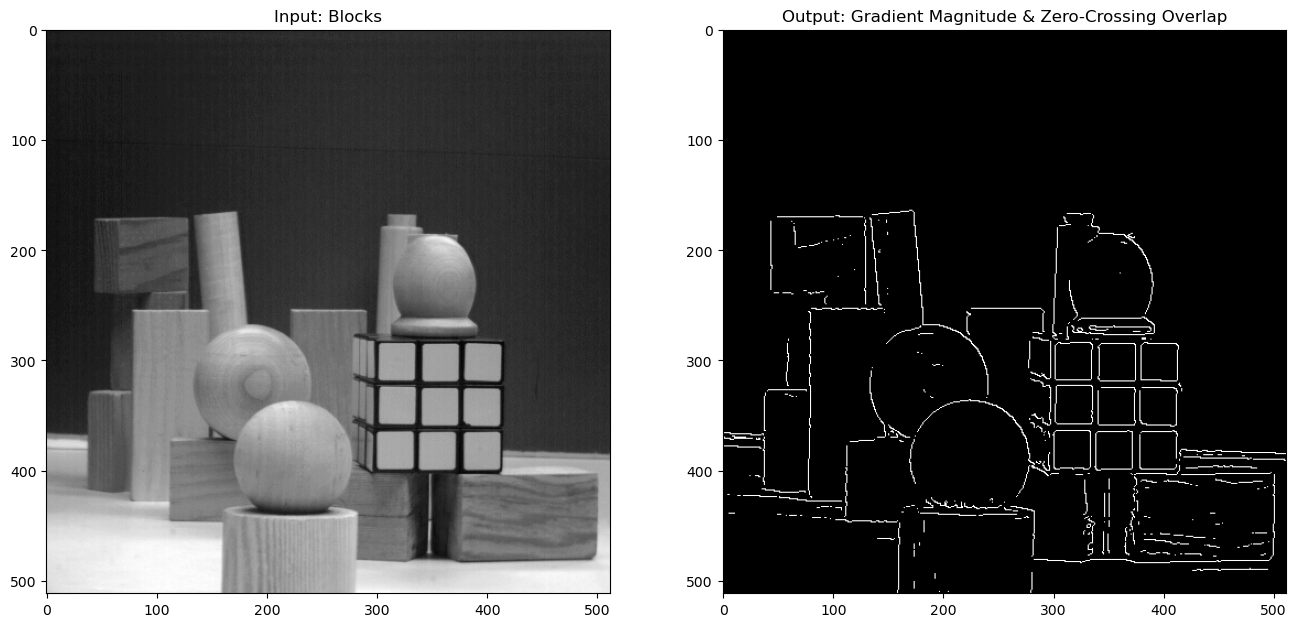

In [40]:
# Part 4. Final Solution

combination = np.logical_and(edges, lap_zeros)

# Show the results on blocks image

plt.figure(figsize=(16,14))
plt.subplot(121)
plt.imshow(blocks, cmap='gray')
plt.title('Input: Blocks')
plt.subplot(122)
plt.imshow(combination, cmap='gray') #making plotted values between 0 and pi
plt.title('Output: Gradient Magnitude & Zero-Crossing Overlap')

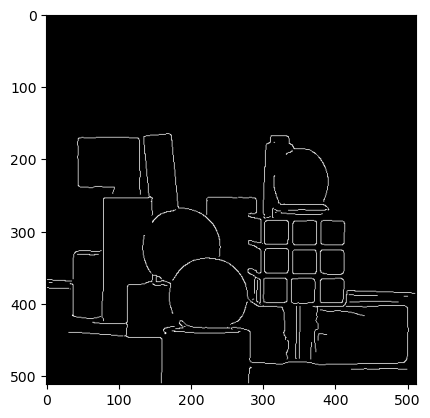

In [41]:
#for comparison

from skimage.feature import canny

skimage_canny = canny(blocks, sigma=2)

plt.imshow(skimage_canny, cmap='gray')

##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>

The results were fairly good, the main problem was being able to get straight continuous lines that determine edges. The final result has a lot of noise around the edges. The places that this edge detection had the biggest issues was where there were shadows or there were overalapping objects. The shadows made some of the blocks (especially the middle top left one) blend in with the background, so there was almost no gradient detected. The the overlapping issue is apparent when you look at the top of the cylinder, there are actually two cylinders but the edge detection says that there is only just one. 



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

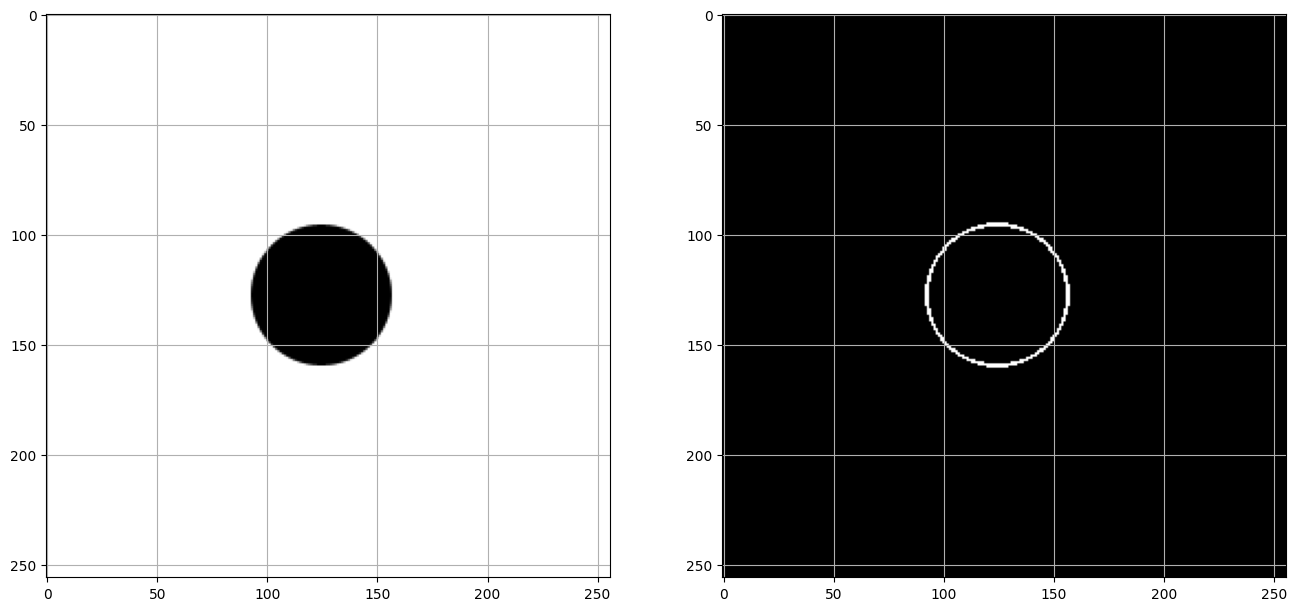

In [169]:
#doing hough transform from scratch
#switching to skimage
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import sobel_h, sobel_v, gaussian
from skimage.color import rgb2gray
from PIL import Image

simple = imread('simplecircle.png') #read in as RGB numpy array
gray = rgb2gray(simple)
dy = sobel_h(gray)
dx = sobel_v(gray)
grad = np.sqrt(dy**2+dx**2)
grad /= np.max(grad) #normalizes between 1 and 0
threshold = 0.6
edges = grad > threshold

plt.figure(figsize=(16,12))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.grid(True)
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.grid(True)

1.0 0.0


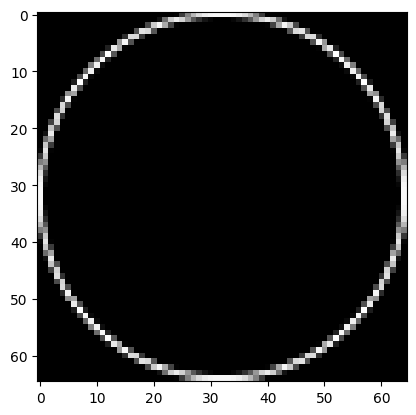

In [170]:
#creating circle stamp to look for in the image
r = 32
f=24
r1 = r*f+3
r2= r*f-3
y, x = np.mgrid[-r1-8:r1+9, -r1-8:r1+9]
circle = np.logical_and((x**2+y**2)<=r1**2, (x**2+y**2)>=r2**2).astype('uint8')*255
circle = np.array(circle)
circle = np.asarray(Image.fromarray(circle).resize((2*r+1, 2*r+1), Image.BICUBIC))
circle = circle / circle.max()
plt.imshow(circle, cmap='gray')
print(np.max(circle), np.min(circle))

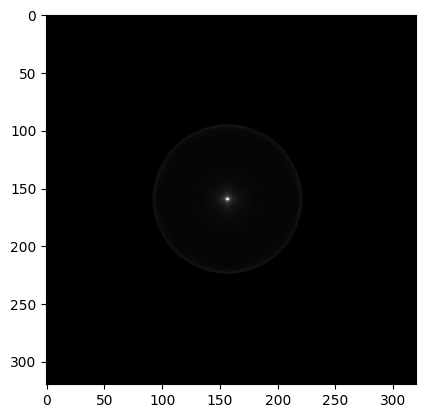

In [171]:
epy, epx = edges.nonzero()
cy, cx = circle.nonzero()

vals = circle[cy, cx]

cx -= r
cy -= r

h, w = gray.shape
accumulator = np.zeros((h+2*r,w+2*r)) #making padding be the diameter of the specified circles to look for

xx = epx[:, None] + r + cx
yy = epy[:, None] + r + cy
np.add.at(accumulator, (yy, xx), vals)
plt.imshow(accumulator, cmap='gray')


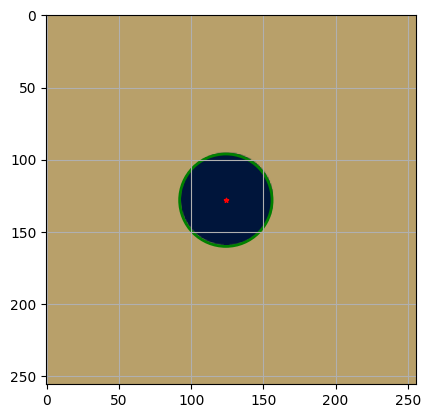

In [173]:
#obtaining coordintes for center point

yp, xp = np.unravel_index(accumulator.argmax(), accumulator.shape)

fig, ax = plt.subplots(1,1)
ax.imshow(simple)
circle_patch = plt.Circle((xp-r, yp-r), r, edgecolor='g', linewidth=2, facecolor='none') #xp-r and yp-r account for padding
ax.add_patch(circle_patch)
ax.scatter(xp-r,yp-r, color='r', marker='*', s=10)
ax.grid()


In [606]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import sobel_h, sobel_v, gaussian, median, laplace
from skimage.color import rgb2gray
from PIL import Image
import matplotlib.pyplot as plt

def hough(image_path, r, threshold, size, k, min_distance, blur): #thresh, 0.6, r, 32

    #read in image and get the edges from gradient magnitude
    img = imread(image_path) #read in as RGB numpy array
    
    # #apply gaussian blur to image if blur=True
    # if blur:
    #     gray = gaussian(gray, sigma=1.3)

    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    gray = rgb2gray(img)

    total_accumulator = []
    xp = []
    yp = []
    #loop through each color channel and find the highest points there
    for color in [red, green, blue, gray]:   
        if blur:
            color = gaussian(color, sigma=1.3)
        dy = sobel_h(color) #gradient in y direction
        dx = sobel_v(color) #gradient in x direction
        orientation = ((np.arctan2(dy, dx) + np.pi) / (np.pi*2)) * 255
        grad = np.sqrt(dy**2+dx**2)
        grad /= np.max(grad) #normalizes between 1 and 0
        edges = grad > threshold

        #get the laplacian for finer edges
        lap = laplace(color, ksize=3)
        lap[lap>0] = 1
        lap[lap<0] = -1
        lap_x = np.where((np.diff(lap, axis=0) == 2) | (np.diff(lap, axis=0) == -2), 1, 0)
        lap_y = np.where((np.diff(lap, axis=1) == 2) | (np.diff(lap, axis=1) == -2), 1, 0)
        lap_x = np.pad(lap_x, ((0, 1), (0, 0)), mode='constant', constant_values=0)  
        lap_y = np.pad(lap_y, ((0, 0), (0, 1)), mode='constant', constant_values=0)
        zeroxing = np.logical_or(lap_x, lap_y)
        new_edges = np.logical_and(edges, zeroxing)        
        
        #create image stamp to find in image with same radius 
        f=24
        r1 = r*f+3
        r2= r*f-3
        y, x = np.mgrid[-r1-8:r1+9, -r1-8:r1+9]
        circle = np.logical_and((x**2+y**2)<=r1**2, (x**2+y**2)>=r2**2).astype('uint8')*255
        circle = np.array(circle)
        circle = np.asarray(Image.fromarray(circle).resize((2*r+1, 2*r+1), Image.BICUBIC))
        circle = circle / circle.max()

        # implement the accumulator array
        epy, epx = new_edges.nonzero()
        cy, cx = circle.nonzero()
        vals = circle[cy, cx]
        cx -= r
        cy -= r
        h, w = new_edges.shape
        accumulator = np.zeros((h+2*r,w+2*r)) #making padding be the diameter of the specified circles to look for
        xx = epx[:, None] + r + cx
        yy = epy[:, None] + r + cy
        np.add.at(accumulator, (yy, xx), vals)

        #getting the outer most part of the images to just a little bit futher than r in all directions and multiplying by a constant to account for edge circle
        test = np.zeros_like(accumulator)
        test_h, test_w = test.shape
        top_left = accumulator
        const = 3
        left, top, right, bottom = accumulator[:r-(r//const), :], accumulator[:, :r-(r//const)], accumulator[:, test_w -r-(r//const)], accumulator[test_h - r-(r//const), :]
        test[:r-(r//const), :] = left
        test[:, :r-(r//const)] = top
        test[:, test_w - r-(r//const)] = right
        test[test_h - r-(r//const), :] = bottom
        max_index = np.argsort(test, axis=None)[-5:]    
        coords = np.unravel_index(max_index, test.shape) 
        for i in range(5):  
            row, col = coords[0][i], coords[1][i]  
            test[row, col] = test[row, col] * 1.05
        accumulator += test
        

        #for final visual
        total_accumulator.append(accumulator)
    
    # #all accumulators are currently being summed up
    # combined_accumulator = np.sum(total_accumulator, axis=0)

    #getting all the maximum accumulator votes 
        top_k = np.argpartition(accumulator.flatten(), -k)[-k:]  
        kp = np.unravel_index(top_k, accumulator.shape)  
        ypapp, xpapp = kp  
        xp.append(xpapp)
        yp.append(ypapp)

    xp = np.array(xp).flatten()
    yp = np.array(yp).flatten()

    def distance(p1, p2):  
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)  

    filtered_points = []  
    for i in range(len(xp)):  
        point = (yp[i], xp[i])  
        if all(distance(point, existing_point) >= min_distance for existing_point in filtered_points):  
            filtered_points.append(point)  
    filtered_points = np.array(filtered_points)  
    yp, xp = filtered_points[:, 0], filtered_points[:, 1]

    #added padding to the original image so that edge circles can be viewed 
    pad_img = np.ones((h+2*r,w+2*r, 3), dtype=img.dtype)
    pad_img[r:h+r, r:w+r] = img  
    
    #showing the accumulator results and the detected circles  
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))  
    
    channel_names = ['Red Channel', 'Green Channel', 'Blue Channel', 'Grayscale']  
    for i in range(2):  
        for j in range(2):
            ax[i, j].imshow(total_accumulator[i], cmap='gray')  
            ax[i, j].set_title(f'{channel_names[i]} Accumulator', fontsize=16)  

    ax[0,2].imshow(pad_img)  
    ax[0,2].set_title('Identified Circles', fontsize=16)  
    for i in range(len(xp)):  
        circle_patch = plt.Circle((xp[i], yp[i]), r, edgecolor='g', linewidth=2, facecolor='none')  # plotting the circles
        ax[0,2].add_patch(circle_patch)  
        ax[0,2].scatter(xp[i], yp[i], color='r', marker='*', s=10)  # showing circle center points 
    ax[1,2].imshow(new_edges, cmap='gray')
    ax[1,2].set_title('Grayscale Edges', fontsize=16)
    
    fig.suptitle(f'Target Sizes: {size}', fontweight='bold', fontsize=24)  
    fig.tight_layout()  
    plt.show()   

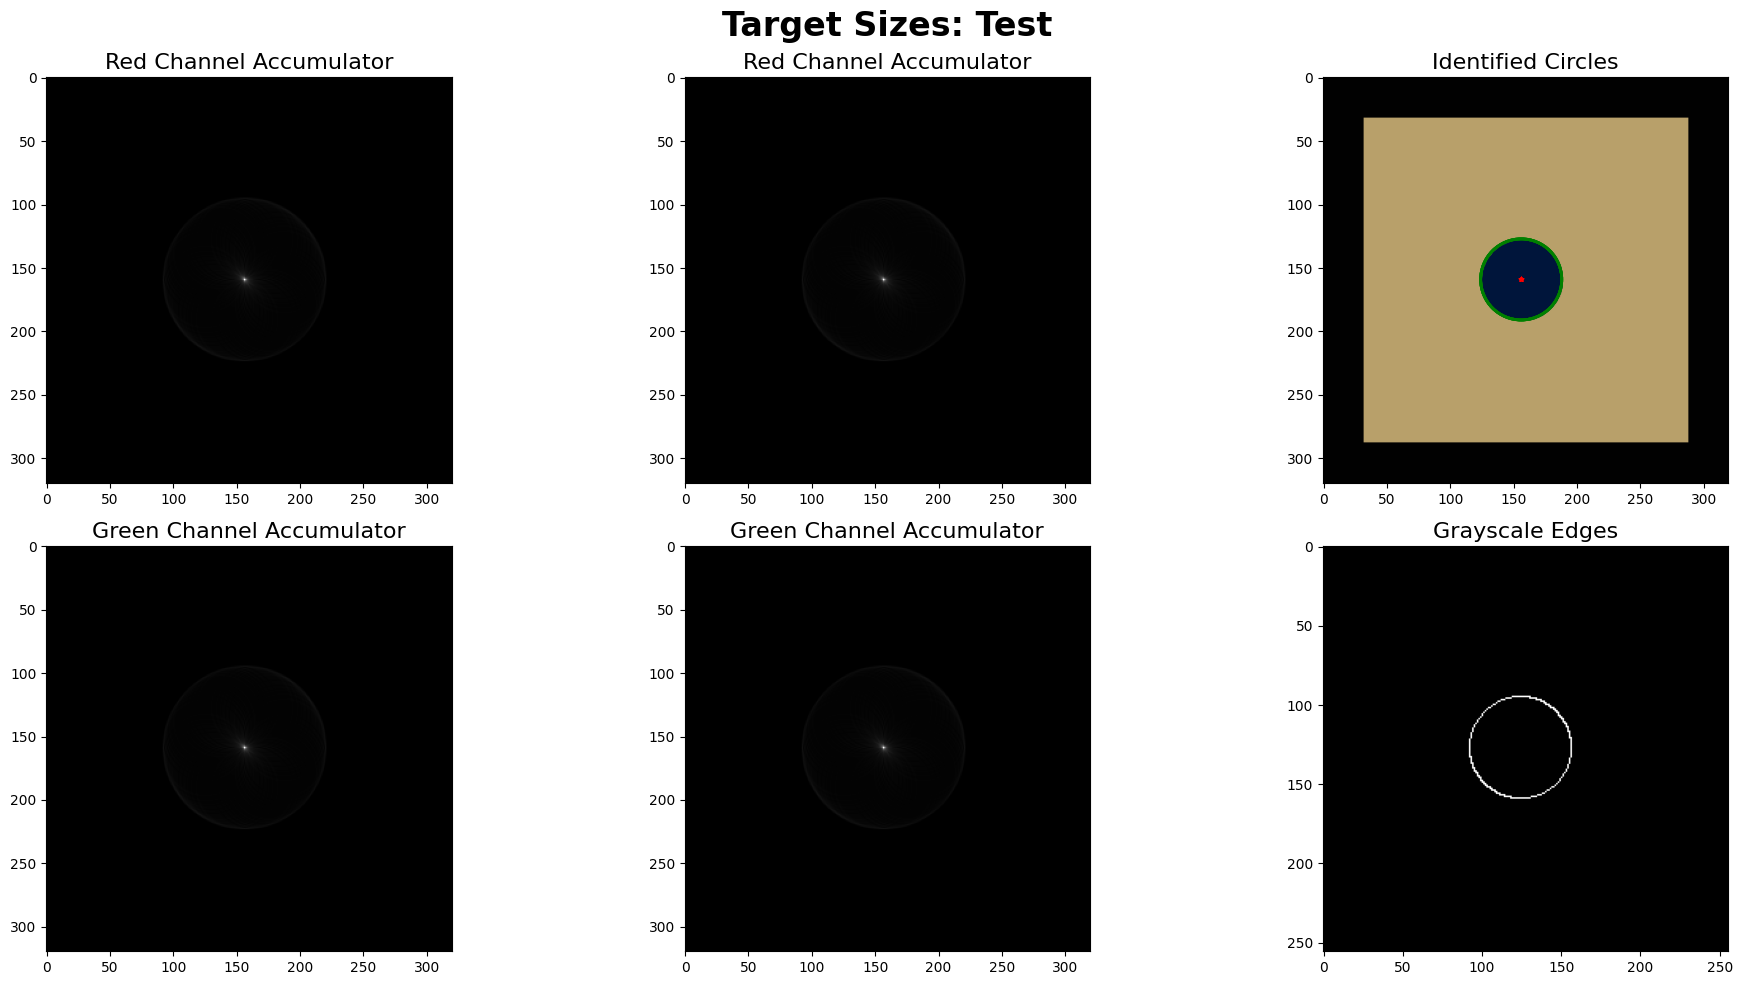

In [608]:
img_path = 'simplecircle.png'
hough(img_path, 32, 0.6, 'Test', 1, 0, blur=True)

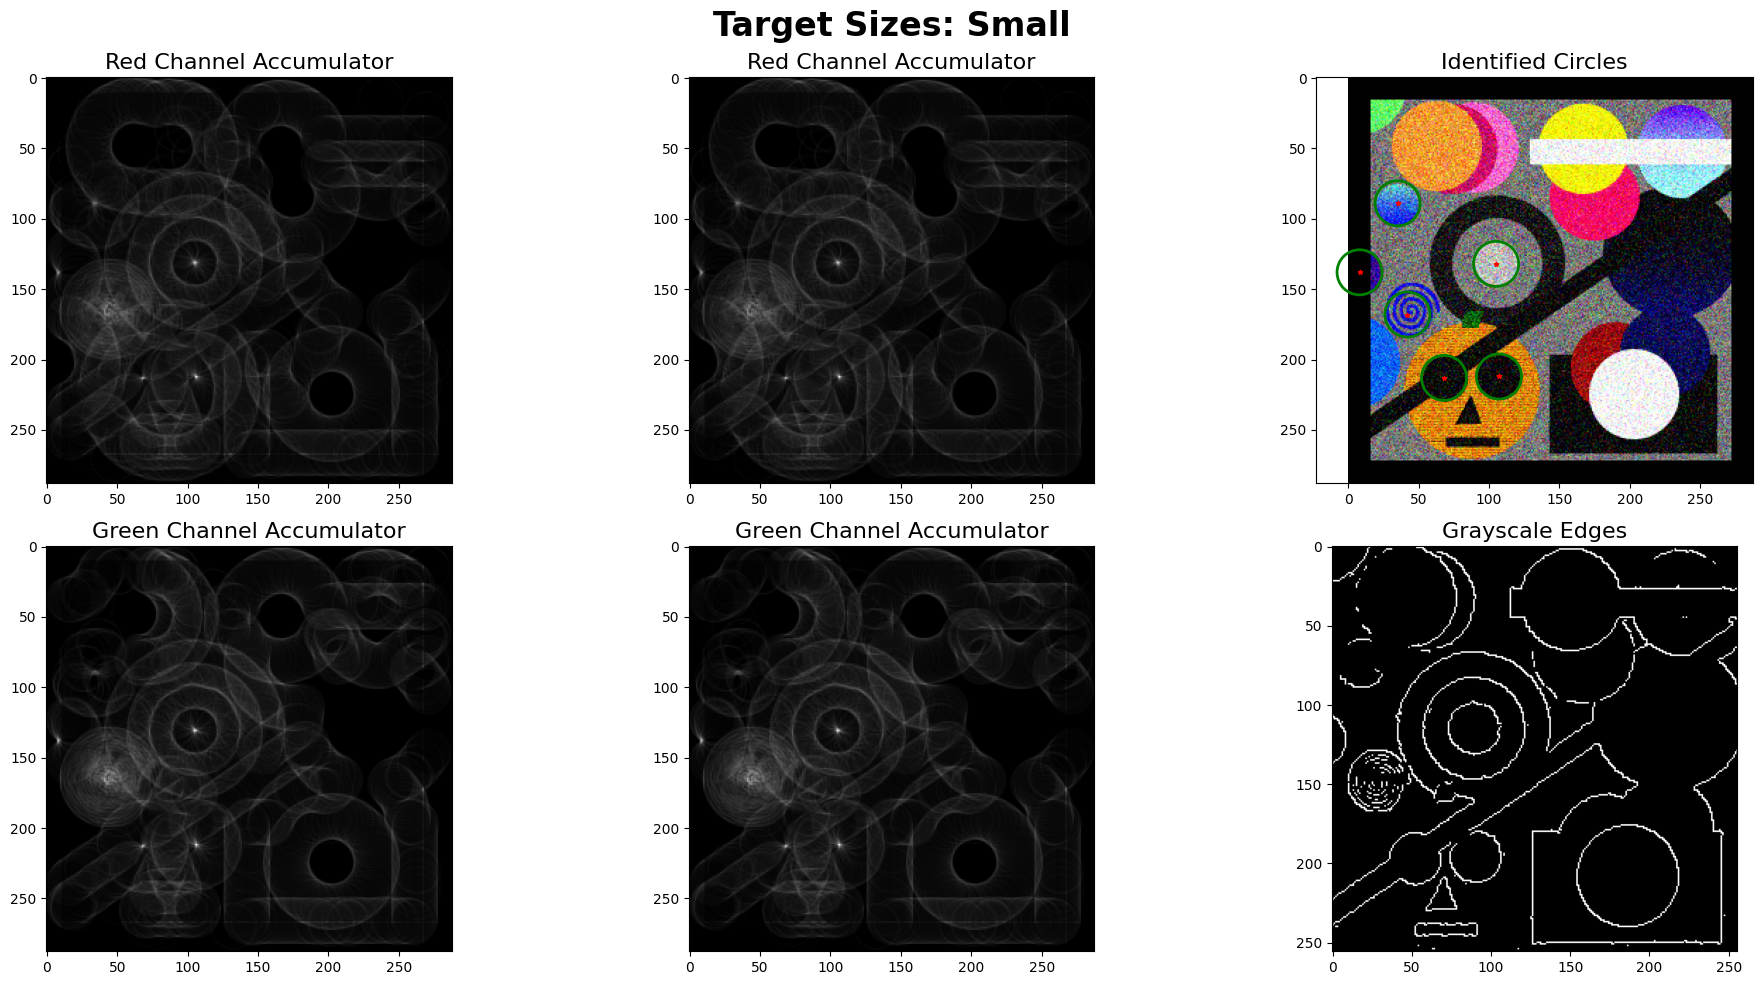

In [609]:
img_path = 'circles.png'
hough(img_path, 16, 0.2, 'Small', 8, 30, blur=True) 

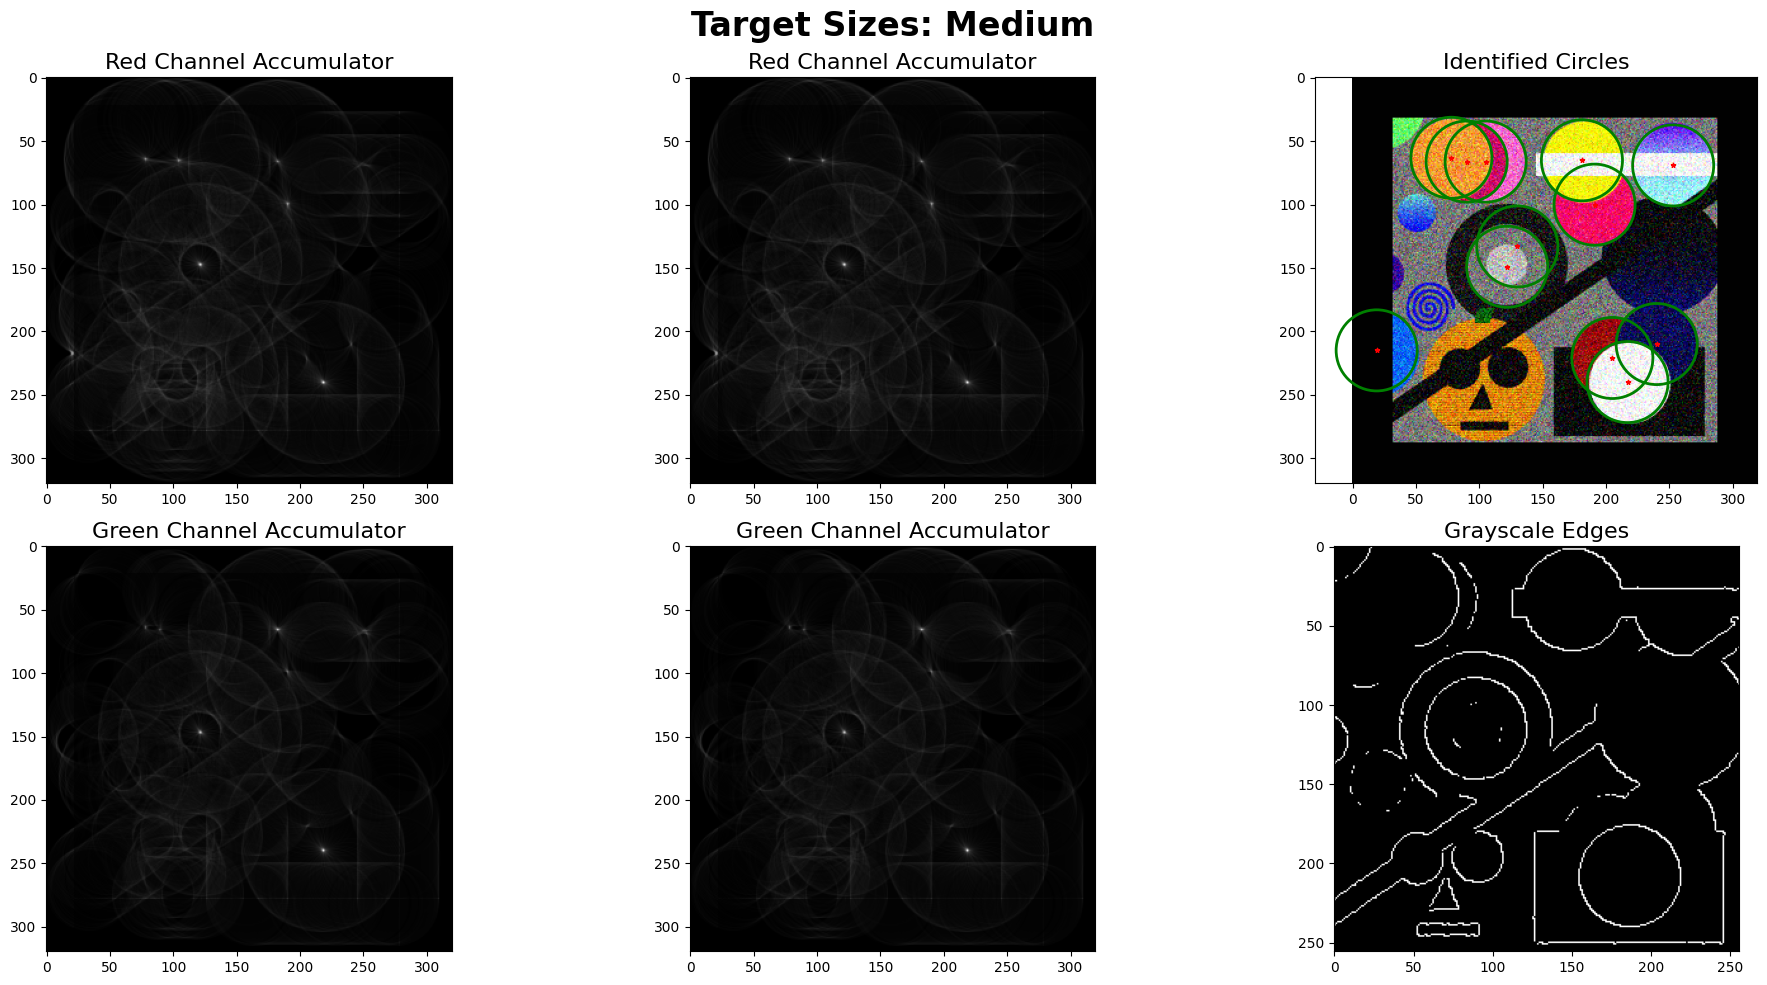

In [610]:
# hough(img_path, 32, 0.3, 'Medium', 51, 12, blur=True)
hough(img_path, 32, 0.31, 'Medium', 50, 12, blur=True)

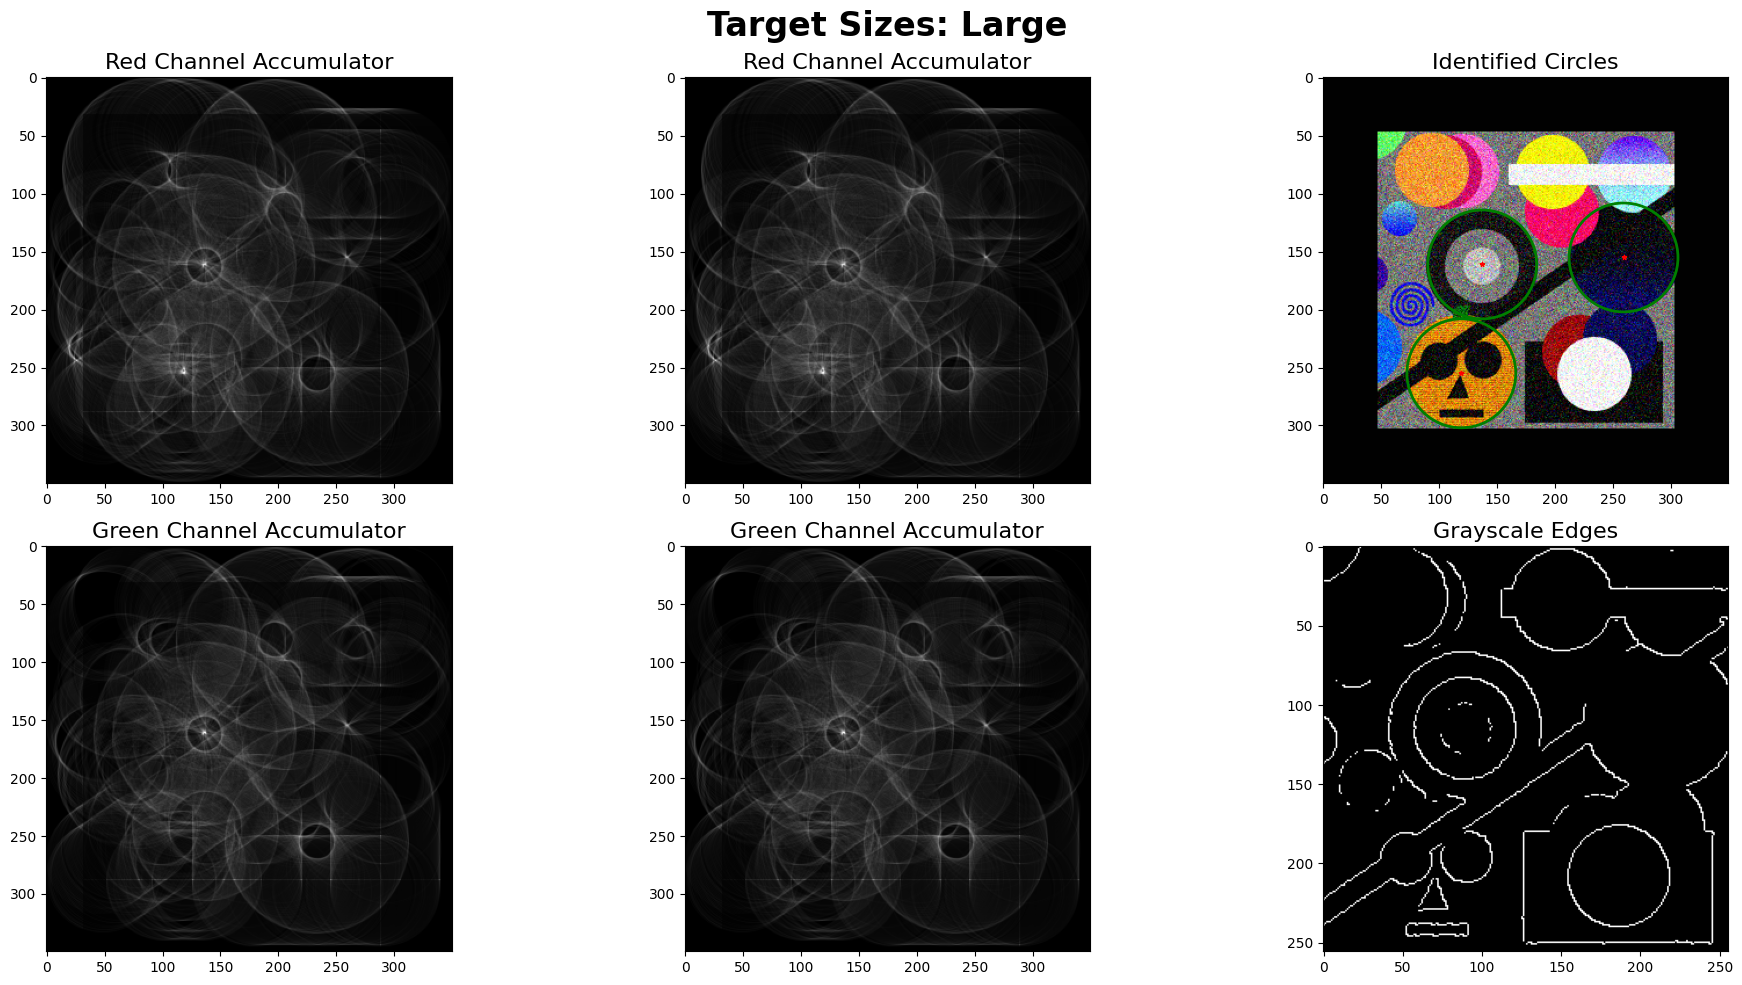

In [611]:
hough(img_path, 47, 0.29, 'Large', 5, 50, blur=True)

##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>

This was implemented by running 4 different color scales through the hough transform to try and get all designated cirlces. One of the problems with detecting all circles was that they are different colors so some would show up more prominenetly in the edge detection than others. To help with detecting edges circles, I took the radius of the input circle and then took the padding for that amount around the edges of the image and then multiplied those by a constant. This helped with detecting two of the edge circles, but the green one still proves to be hard to get. One thing that could possibly be used to detect it (that I have not done) is use orientation as something that influences the voting for highest valued points in the accumulator.